# Diagnosis & Treatment Recommendation Engine

## Load Dataset & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Health_Dataset/Training.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,disease
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


# Data Preprocessing & Exploratory Data Analysis (EDA) 📊

In [3]:
df.shape

(4920, 133)

In [4]:
df['disease'].value_counts()

disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

In [5]:
len(df['disease'].unique())

41

In [6]:
df.duplicated().sum()

4616

In [7]:
df.shape

(4920, 133)

In [8]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
disease                 0
Length: 133, dtype: int64

In [9]:
df['disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [10]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to disease
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [12]:
symptoms = df.drop("disease", axis=1)
symptoms

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


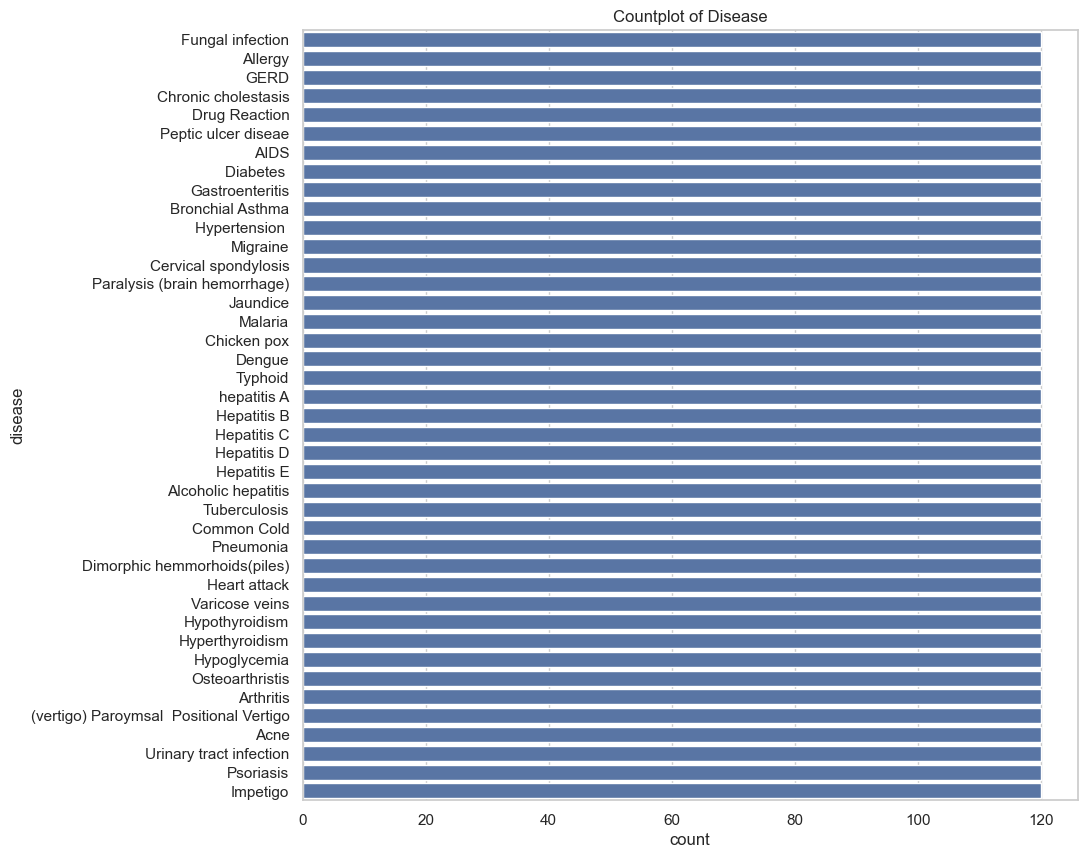

In [13]:
# Set up the plot style
sns.set(style="whitegrid")

# 1. Countplot for categorical variables (example: disease)

plt.figure(figsize=(10,10))
sns.countplot(y='disease', data=df)
plt.title('Countplot of Disease')
plt.show()

# Feature Engineering 🛠

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [15]:
x = df.drop("disease", axis=1)
y = df["disease"]

In [16]:
le_disease = LabelEncoder()
le_disease.fit(y)
y = le_disease.transform(y)
y

array([15, 15, 15, ..., 38, 35, 27])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=22)

In [18]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3690, 132), (1230, 132), (3690,), (1230,))

# Model Training & Evaluation 🤖 

In [19]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix


In [20]:
# Create a dictionary to store models
models = {
    "SVC" : SVC(kernel='linear'),
    "RandomForest" : RandomForestClassifier(n_estimators=100, random_state=44),
    "GradientBoosting" : GradientBoostingClassifier(n_estimators=100, random_state=44),
    "KNeighbors" : KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB" : MultinomialNB(),
    "LogisticRegression" : LogisticRegression()
} 


In [21]:
for model_name, model in models.items():
    #train model
    model.fit(x_train, y_train)

    #test model
    predictions = model.predict(x_test)

    # calculate accuracy
    accuracy = accuracy_score(y_test, predictions)*100

    # calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)

    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator= ','))

SVC accuracy : 100.0
SVC Confusion Matrix:
[[25, 0, 0,..., 0, 0, 0],
 [ 0,35, 0,..., 0, 0, 0],
 [ 0, 0,25,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,28, 0, 0],
 [ 0, 0, 0,..., 0,35, 0],
 [ 0, 0, 0,..., 0, 0,33]]
RandomForest accuracy : 100.0
RandomForest Confusion Matrix:
[[25, 0, 0,..., 0, 0, 0],
 [ 0,35, 0,..., 0, 0, 0],
 [ 0, 0,25,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,28, 0, 0],
 [ 0, 0, 0,..., 0,35, 0],
 [ 0, 0, 0,..., 0, 0,33]]
GradientBoosting accuracy : 100.0
GradientBoosting Confusion Matrix:
[[25, 0, 0,..., 0, 0, 0],
 [ 0,35, 0,..., 0, 0, 0],
 [ 0, 0,25,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,28, 0, 0],
 [ 0, 0, 0,..., 0,35, 0],
 [ 0, 0, 0,..., 0, 0,33]]
KNeighbors accuracy : 100.0
KNeighbors Confusion Matrix:
[[25, 0, 0,..., 0, 0, 0],
 [ 0,35, 0,..., 0, 0, 0],
 [ 0, 0,25,..., 0, 0, 0],
 ...,
 [ 0, 0, 0,...,28, 0, 0],
 [ 0, 0, 0,..., 0,35, 0],
 [ 0, 0, 0,..., 0, 0,33]]
MultinomialNB accuracy : 100.0
MultinomialNB Confusion Matrix:
[[25, 0, 0,..., 0, 0, 0],
 [ 0,35, 0,..., 0, 0, 0],
 [ 0, 0

## Confusion Matrix Visualization 🔍

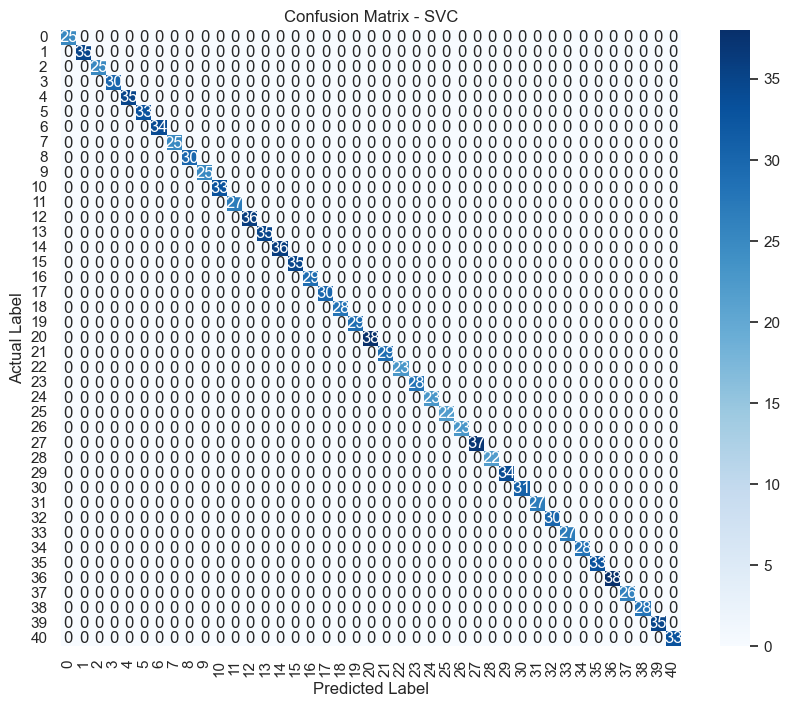

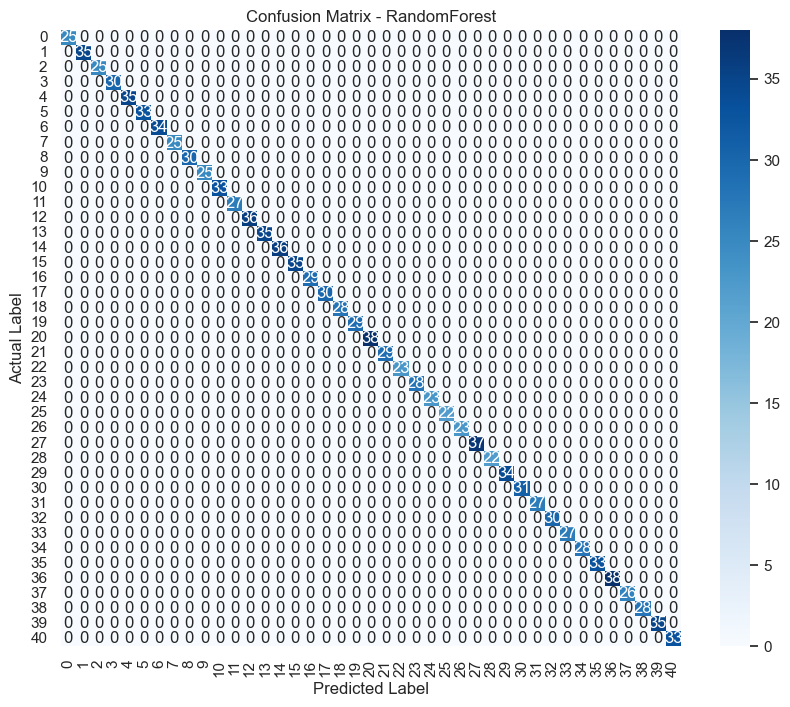

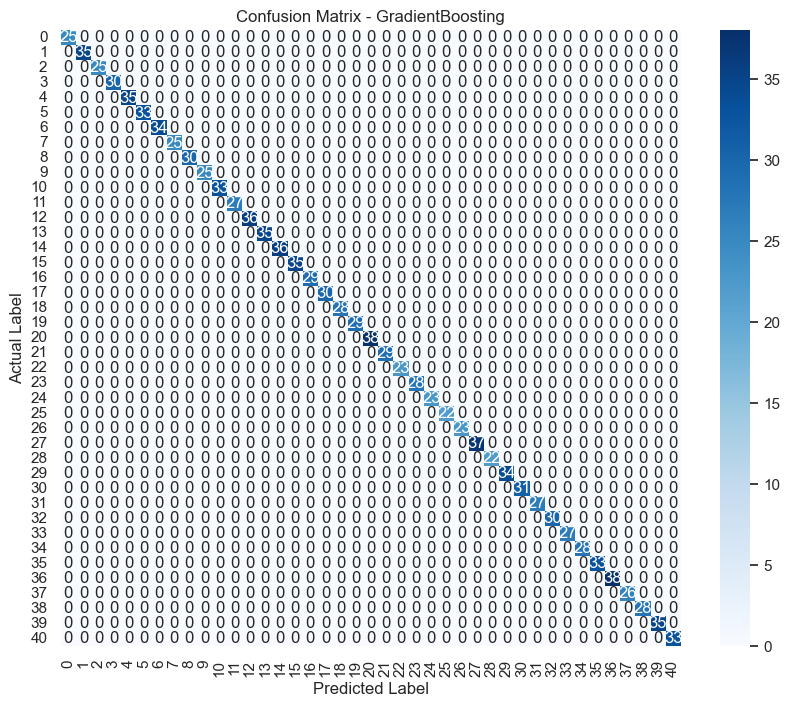

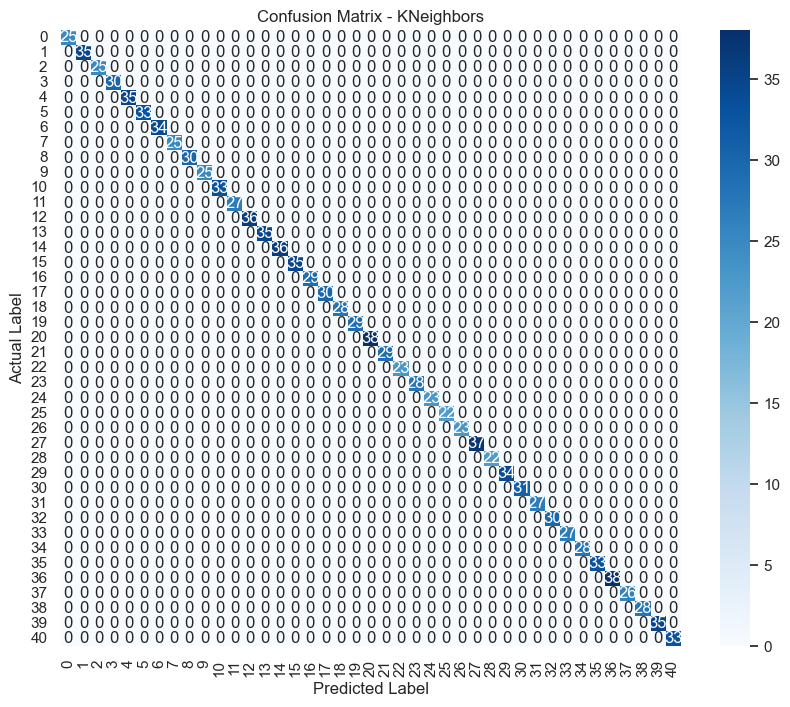

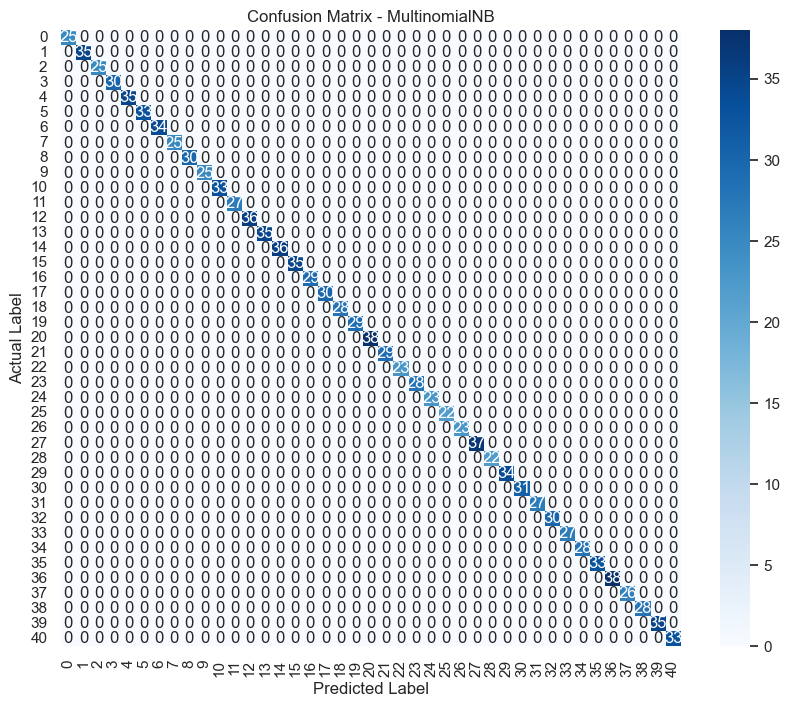

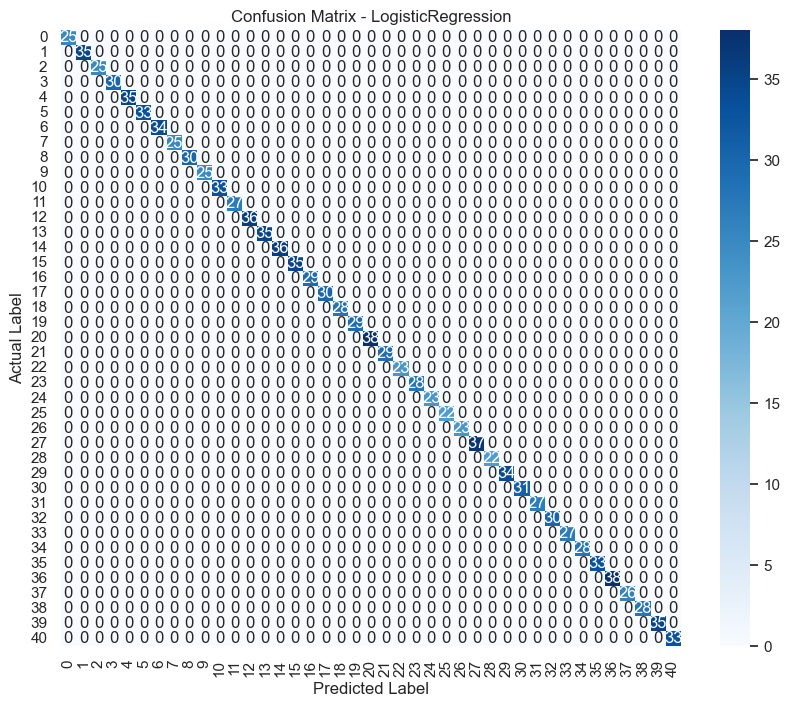

In [22]:
# Function to plot the confusion matrix

def plot_confusion_matrix(y_true, pred, model_name):
    cm = confusion_matrix(y_true, pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Generate confusion matrices for all models

for model_name, model in models.items():
    pred = model.predict(x_test)
    plot_confusion_matrix(y_test, pred, model_name)

## Final Model Selection 🏆

In [23]:
svc = SVC(kernel = "linear")
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
accuracy_score(y_test,pred)*100

100.0

In [24]:

print("Predicted Label : ", pred[2])
print("Actual Label : ", y_test[2])

Predicted Label :  14
Actual Label :  14


#### Saving Model 

In [25]:
import pickle
pickle.dump(svc,open("svc.pkl",'wb'))

#### Load the Model

In [26]:
svc = pickle.load(open("svc.pkl",'rb'))

In [27]:
svc = svc.predict(x_test.iloc[1].values.reshape(1,-1))
print("Predicted Label : ", svc)
print("Actual Label : ", y_test[1])

Predicted Label :  [35]
Actual Label :  35


# Recommendation System & Prediction
#### Load Database & Use Logic for Recommendations

In [28]:
# symtoms = pd.read_csv("Health_Dataset/symtoms_df.csv")
precautions = pd.read_csv("Health_Dataset/precautions_df.csv")
workout = pd.read_csv("Health_Dataset/workout_df.csv")
description = pd.read_csv("Health_Dataset/description.csv")
medications = pd.read_csv("Health_Dataset/medications.csv")
diets = pd.read_csv("Health_Dataset/diets.csv")

In [29]:
description.head()

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [30]:
svc = SVC(kernel='linear', probability=True)
svc.fit(x_train,y_train)
pred = svc.predict(x_test)

#### Model Prediction Function

In [31]:
# Helper Functions

def helper(disease):
    desc = description[description['Disease'] == disease]['Description']
    desc = " ".join([w for w in desc])
    
    pre = precautions[precautions['Disease'] == disease][['Precaution_1','Precaution_2','Precaution_3','Precaution_4']]
    pre = [pre for pre in pre.values]

    med = medications[medications['Disease'] == disease]['Medication']
    med = [med for med in med.values]

    diet = diets[diets['Disease'] == disease]['Diet']
    diet = [diet for diet in diet.values]

    wrk = workout[workout['disease'] == disease]['workout']
    return desc,pre,med,diet,wrk


symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function

def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))

    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
        prediction = svc.predict([input_vector])[0]    
        return diseases_list[prediction]   

In [32]:
symptoms_dict

{'itching': 0,
 'skin_rash': 1,
 'nodal_skin_eruptions': 2,
 'continuous_sneezing': 3,
 'shivering': 4,
 'chills': 5,
 'joint_pain': 6,
 'stomach_pain': 7,
 'acidity': 8,
 'ulcers_on_tongue': 9,
 'muscle_wasting': 10,
 'vomiting': 11,
 'burning_micturition': 12,
 'spotting_ urination': 13,
 'fatigue': 14,
 'weight_gain': 15,
 'anxiety': 16,
 'cold_hands_and_feets': 17,
 'mood_swings': 18,
 'weight_loss': 19,
 'restlessness': 20,
 'lethargy': 21,
 'patches_in_throat': 22,
 'irregular_sugar_level': 23,
 'cough': 24,
 'high_fever': 25,
 'sunken_eyes': 26,
 'breathlessness': 27,
 'sweating': 28,
 'dehydration': 29,
 'indigestion': 30,
 'headache': 31,
 'yellowish_skin': 32,
 'dark_urine': 33,
 'nausea': 34,
 'loss_of_appetite': 35,
 'pain_behind_the_eyes': 36,
 'back_pain': 37,
 'constipation': 38,
 'abdominal_pain': 39,
 'diarrhoea': 40,
 'mild_fever': 41,
 'yellow_urine': 42,
 'yellowing_of_eyes': 43,
 'acute_liver_failure': 44,
 'fluid_overload': 45,
 'swelling_of_stomach': 46,
 'swelle

In [33]:
type(svc)

sklearn.svm._classes.SVC

In [34]:
## Symptoms for Testing
# 1. itching,skin_rash,shivering,chills
# 2. stomach_pain,acidity,ulcers_on_tongue,muscle_wasting
# 3. muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements
# 4. pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting

In [35]:
# Test 1:
symptoms = input("Enter your Symptoms........")
user_symptoms = [s.strip("[]' ") for s in symptoms.split(',')]
# user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)
desc,pre,med,diet,wrk = helper(predicted_disease)


# Display Disease
print("=================Predicted Disease============")
print(predicted_disease)
print("=================Description==================")
print(desc)
print("=================Precautions==================")
i = 1
for p in pre[0]:
    print(i,": ",p)
    i +=1
print("=================Medications==================")
i = 1
for m in med:
    print(i,": ", m)
    i +=1

print("=================Diets==================")
i = 1
for d in diet:
    print(i, ": ", d)
    i +=1

print("=================Workout==================")
i = 1
for w in wrk:
    print(i, ": ", w)
    i +=1

Enter your Symptoms........  itching,skin_rash,shivering,chills


=================Predicted Disease============
Fungal infection
=================Description==================
Fungal infection is a common skin condition caused by fungi.
=================Precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================Medications==================
1 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================Diets==================
1 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
=================Workout==================
1 :  Avoid sugary foods
2 :  Consume probiotics
3 :  Increase intake of garlic
4 :  Include yogurt in diet
5 :  Limit processed foods
6 :  Stay hydrated
7 :  Consume green tea
8 :  Eat foods rich in zinc
9 :  Include turmeric in diet
10 :  Eat fruits and vegetables


In [36]:
# Test 2:
symptoms = input("Enter your Symptoms........")
user_symptoms = [s.strip("[]' ") for s in symptoms.split(',')]
# user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)
desc,pre,med,diet,wrk = helper(predicted_disease)


# Display Disease
print("=================Predicted Disease============")
print(predicted_disease)
print("=================Description==================")
print(desc)
print("=================Precautions==================")
i = 1
for p in pre[0]:
    print(i,": ",p)
    i +=1
print("=================Medications==================")
i = 1
for m in med:
    print(i,": ", m)
    i +=1

print("=================Diets==================")
i = 1
for d in diet:
    print(i, ": ", d)
    i +=1

print("=================Workout==================")
i = 1
for w in wrk:
    print(i, ": ", w)
    i +=1

Enter your Symptoms........  stomach_pain,acidity,ulcers_on_tongue,muscle_wasting


=================Predicted Disease============
Drug Reaction
=================Description==================
Drug Reaction occurs when the body reacts adversely to a medication.
=================Precautions==================
1 :  stop irritation
2 :  consult nearest hospital
3 :  stop taking drug
4 :  follow up
=================Medications==================
1 :  ['Antihistamines', 'Epinephrine', 'Corticosteroids', 'Antibiotics', 'Antifungal Cream']
=================Diets==================
1 :  ['Antihistamine Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']
=================Workout==================
1 :  Discontinue offending medication
2 :  Stay hydrated
3 :  Include anti-inflammatory foods
4 :  Consume antioxidants
5 :  Avoid trigger foods
6 :  Include omega-3 fatty acids
7 :  Limit caffeine and alcohol
8 :  Stay hydrated
9 :  Eat a balanced diet
10 :  Consult a healthcare professional


In [ ]:
# Test 3:
symptoms = input("Enter your Symptoms........")
user_symptoms = [s.strip("[]' ") for s in symptoms.split(',')]
# user_symptoms = [sym.strip("[]' ") for sym in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)
desc,pre,med,diet,wrk = helper(predicted_disease)


# Display Disease
print("=================Predicted Disease============")
print(predicted_disease)
print("=================Description==================")
print(desc)
print("=================Precautions==================")
i = 1
for p in pre[0]:
    print(i,": ",p)
    i +=1
print("=================Medications==================")
i = 1
for m in med:
    print(i,": ", m)
    i +=1

print("=================Diets==================")
i = 1
for d in diet:
    print(i, ": ", d)
    i +=1

print("=================Workout==================")
i = 1
for w in wrk:
    print(i, ": ", w)
    i +=1